In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_funda=pd.read_csv("fundamentals.csv")

In [3]:
df_funda.head()

,Unnamed: 0,Ticker Symbol,Period Ending,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,...,Total Current Assets,Total Current Liabilities,Total Equity,Total Liabilities,Total Liabilities & Equity,Total Revenue,Treasury Stock,For Year,Earnings Per Share,Estimated Shares Outstanding
0,0,AAL,2012-12-31,3.068000e+09,-222000000.0,-1.961000e+09,23.0,-1.888000e+09,4.695000e+09,53.0,...,7.072000e+09,9.011000e+09,-7.987000e+09,2.489100e+10,1.690400e+10,2.485500e+10,-367000000.0,2012.0,-5.60,3.350000e+08
1,1,AAL,2013-12-31,4.975000e+09,-93000000.0,-2.723000e+09,67.0,-3.114000e+09,1.059200e+10,75.0,...,1.432300e+10,1.380600e+10,-2.731000e+09,4.500900e+10,4.227800e+10,2.674300e+10,0.0,2013.0,-11.25,1.630222e+08
2,2,AAL,2014-12-31,4.668000e+09,-160000000.0,-1.500000e+08,143.0,-5.311000e+09,1.513500e+10,60.0,...,1.175000e+10,1.340400e+10,2.021000e+09,4.120400e+10,4.322500e+10,4.265000e+10,0.0,2014.0,4.02,7.169154e+08
3,3,AAL,2015-12-31,5.102000e+09,352000000.0,-7.080000e+08,135.0,-6.151000e+09,1.159100e+10,51.0,...,9.985000e+09,1.360500e+10,5.635000e+09,4.278000e+10,4.841500e+10,4.099000e+10,0.0,2015.0,11.39,6.681299e+08
4,4,AAP,2012-12-29,2.409453e+09,-89482000.0,6.000000e+05,32.0,-2.711820e+08,5.202150e+08,23.0,...,3.184200e+09,2.559638e+09,1.210694e+09,3.403120e+09,4.613814e+09,6.205003e+09,-27095000.0,2012.0,5.29,7.328355e+07


In [4]:
df_price=pd.read_csv("prices.csv")

In [5]:
df_small=df_price.loc[0:5000]

In [6]:
df_small.head()

,date,symbol,open,close,low,high,volume
0,2016-01-05 00:00:00,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06 00:00:00,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07 00:00:00,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08 00:00:00,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11 00:00:00,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


In [7]:
df_small.shape

(5001, 7)

In [8]:
df_small['date'] = pd.to_datetime(df_small['date'])

F:\Examples\New folder\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [9]:
df_small.set_index('date',inplace=True)

In [10]:
df_small.shape

(5001, 6)

In [11]:
df_small.head()

,symbol,open,close,low,high,volume
date,,,,,,
2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


## DATA CLEANING

In [12]:
df_small.dropna()
df_small.describe()

,open,close,low,high,volume
count,5001.000000,5001.000000,5001.000000,5001.000000,5.001000e+03
mean,50.701276,50.764809,50.138878,51.230204,6.750756e+06
std,51.717788,51.581598,51.071396,52.103937,1.620601e+07
min,1.430000,1.430000,1.390000,1.440000,0.000000e+00
25%,25.410000,25.469999,25.090000,25.730000,1.280000e+06
50%,38.880002,38.930000,38.490000,39.240002,2.863900e+06
75%,57.959999,58.020000,57.320006,58.590000,6.186700e+06
max,627.181073,626.751061,624.241073,629.511067,3.208684e+08


## VISUALISATION

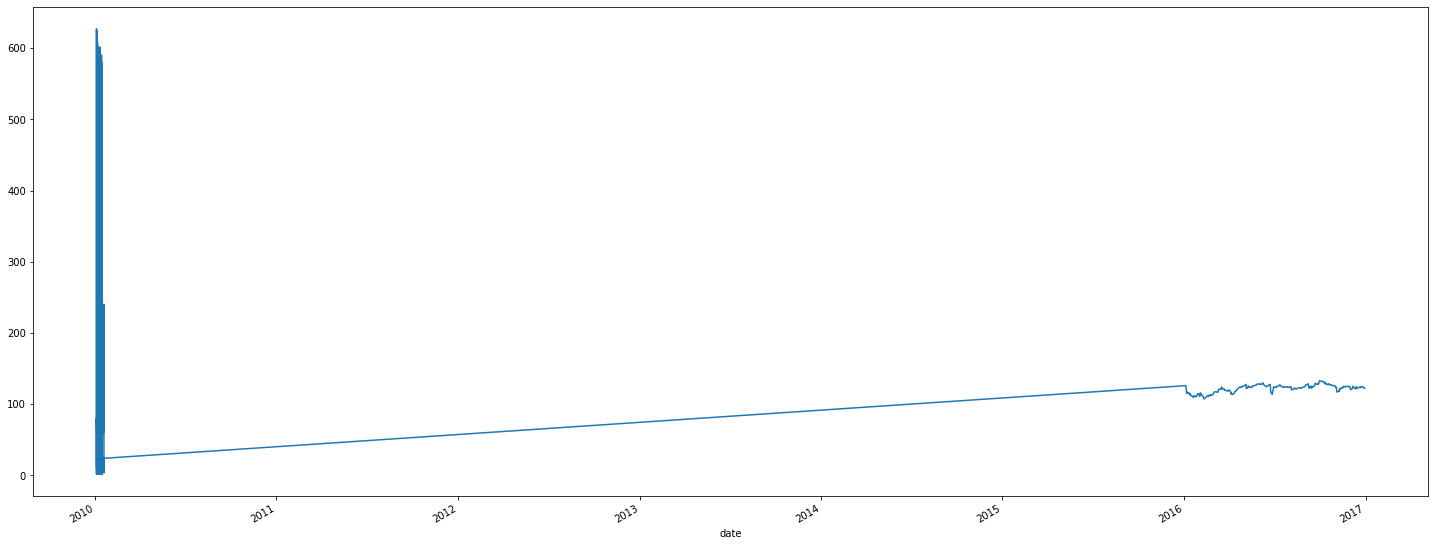

In [13]:
df_small['close'].plot.line(figsize=(25,10))

In [14]:
import statsmodels.api as sm

In [15]:
time_series=df_small['close']

In [16]:
type(time_series)

pandas.core.series.Series

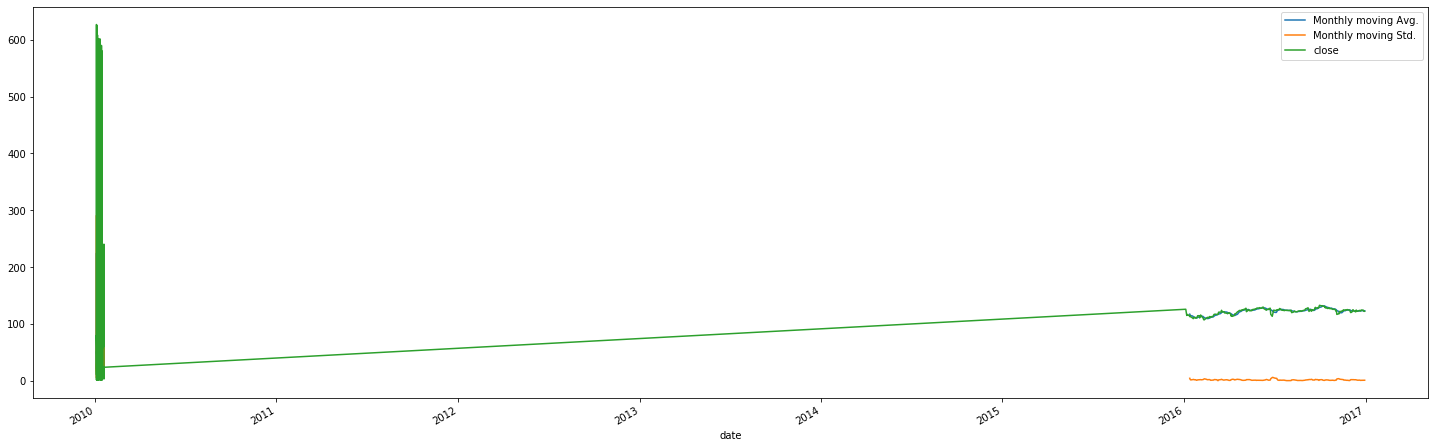

In [17]:
time_series.rolling(7).mean().plot(label='Monthly moving Avg.',figsize=(25,8))
time_series.rolling(7).std().plot(label='Monthly moving Std.',figsize=(25,8))
time_series.plot()
plt.legend()



## DECOMPOSITION

<Figure size 432x288 with 0 Axes>

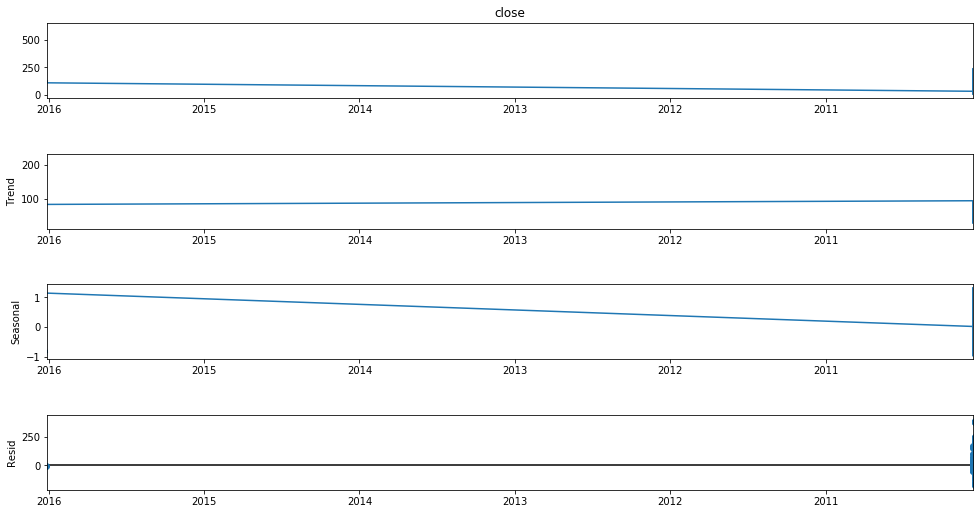

In [18]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df_small['close'], period=7)  
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(15, 8)



## STATIONARITY CHECK
WE will do the Dickey-Fuller test on the data

In [19]:
from statsmodels.tsa.stattools import adfuller


In [20]:
result = adfuller(df_small['close'])

In [21]:
print('Augmented Dickey-Fuller Test:')
labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']

for value,label in zip(result,labels):
    print(label+' : '+str(value) )
    
if result[1] <= 0.05:
    print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
else:
    print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

Augmented Dickey-Fuller Test:
ADF Test Statistic : -6.562169913327594
p-value : 8.32862832290822e-09
#Lags Used : 31
Number of Observations Used : 4969
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [22]:
## Hence we see trhat the given data is stationary

### Just to make sure our data is stationary we will do the adfuller test on first difference


In [23]:
df_small['first close difference']=df_small['close']-df_small['close'].shift(1)

F:\Examples\New folder\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [24]:
def adf_check(time_series):
    """
    Pass in a time series, returns ADF report
    """
    result = adfuller(time_series)
    print('Augmented Dickey-Fuller Test:')
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']

    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [25]:
adf_check(df_small['first close difference'].dropna())

Augmented Dickey-Fuller Test:
ADF Test Statistic : -24.634884698299036
p-value : 0.0
#Lags Used : 30
Number of Observations Used : 4969
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [26]:
## Hence, we can proceed with the data

In [27]:
## Seasonal Difference 
df_small['seasonal difference']=df_small['close']-df_small['close'].shift(7)

F:\Examples\New folder\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [28]:
adf_check(df_small['seasonal difference'].dropna())

Augmented Dickey-Fuller Test:
ADF Test Statistic : -18.03690157897357
p-value : 2.6653310750295315e-30
#Lags Used : 32
Number of Observations Used : 4961
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


## Autocorrelation and Partial Autocorrelation Plots

In [29]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

## ACF 

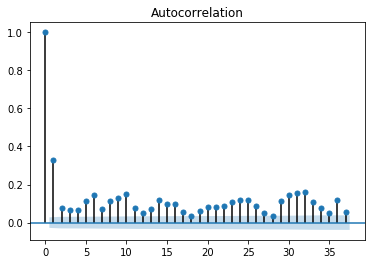

In [30]:
fig_first = plot_acf(df_small["close"].dropna())

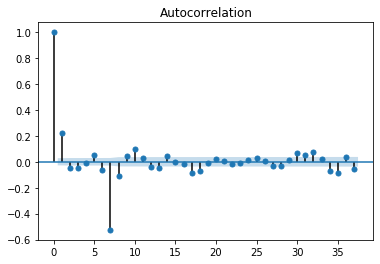

In [32]:
fig_seasonal_first = plot_acf(df_small["seasonal difference"].dropna())

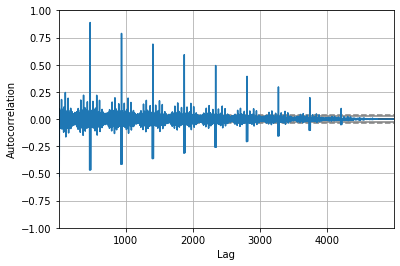

In [33]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df_small['seasonal difference'].dropna())

## PACF

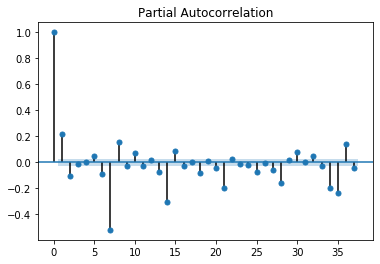

In [34]:
result = plot_pacf(df_small["seasonal difference"].dropna())

In [35]:
## wE CAN SAY THAT IT IS AR DEPENDENT AS THERE IS A +VE CORRELATION

## FINAL ACF AND PACF MODEL

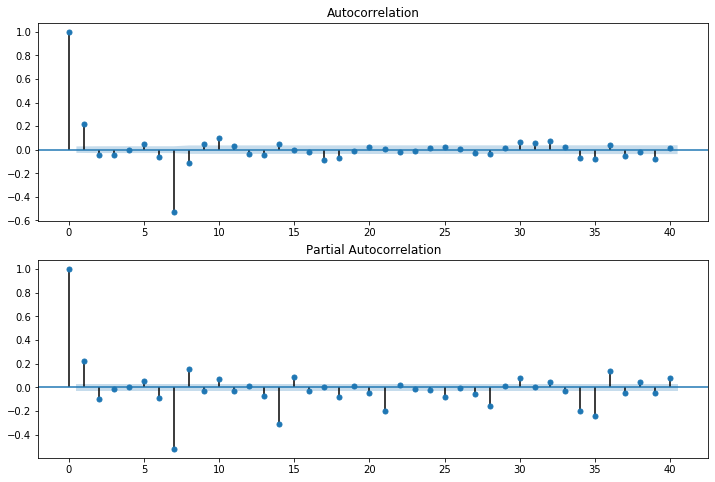

In [37]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df_small['seasonal difference'].iloc[8:], lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df_small['seasonal difference'].iloc[8:], lags=40, ax=ax2)

## USING SEASONAL ARIMA 

In [39]:
from statsmodels.tsa.arima_model import ARIMA

In [40]:
help(ARIMA)

Help on class ARIMA in module statsmodels.tsa.arima_model:

class ARIMA(ARMA)
 |  ARIMA(endog, order, exog=None, dates=None, freq=None, missing='none')
 |  
 |  Autoregressive Integrated Moving Average ARIMA(p,d,q) Model
 |  
 |  Parameters
 |  ----------
 |  endog : array_like
 |      The endogenous variable.
 |  order : iterable
 |      The (p,d,q) order of the model for the number of AR parameters,
 |      differences, and MA parameters to use.
 |  exog : array_like, optional
 |      An optional array of exogenous variables. This should *not* include a
 |      constant or trend. You can specify this in the `fit` method.
 |  dates : array_like, optional
 |      An array-like object of datetime objects. If a pandas object is given
 |      for endog or exog, it is assumed to have a DateIndex.
 |  freq : str, optional
 |      The frequency of the time-series. A Pandas offset or 'B', 'D', 'W',
 |      'M', 'A', or 'Q'. This is optional if dates are given.
 |  
 |  
 |  Notes
 |  -----
 |

In [41]:
model = sm.tsa.statespace.SARIMAX(df_small['close'],order=(0,1,0), seasonal_order=(1,1,1,7))
results = model.fit()
print(results.summary())

F:\Examples\New folder\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
F:\Examples\New folder\lib\site-packages\statsmodels\tsa\base\tsa_model.py:222: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWarning)
F:\Examples\New folder\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
F:\Examples\New folder\lib\site-packages\statsmodels\tsa\base\tsa_model.py:222: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWarning)


                                      SARIMAX Results                                      
Dep. Variable:                               close   No. Observations:                 5001
Model:             SARIMAX(0, 1, 0)x(1, 1, [1], 7)   Log Likelihood              -27507.080
Date:                             Sat, 23 Jan 2021   AIC                          55020.160
Time:                                     20:16:54   BIC                          55039.707
Sample:                                          0   HQIC                         55027.011
                                            - 5001                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L7       -0.0808      0.011     -7.511      0.000      -0.102      -0.060
ma.S.L7       -0.9999      

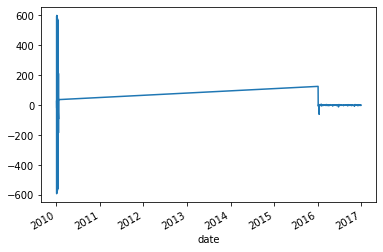

In [42]:
results.resid.plot()

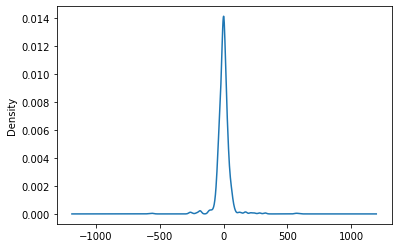

In [43]:
results.resid.plot(kind='kde')

## FORECASTING

F:\Examples\New folder\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


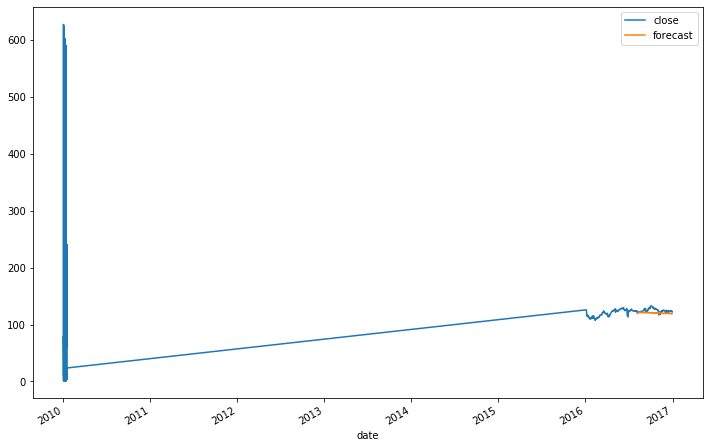

In [59]:
df_small['forecast'] = results.predict(start =150 , end= 251, dynamic= True)  
df_small[['close','forecast']].plot(figsize=(12,8))

In [60]:
df_small.tail()

,symbol,open,close,low,high,volume,first close difference,seasonal difference,forecast
date,,,,,,,,,
2010-01-19,BWA,37.380001,37.680000,37.060001,37.919998,2778000.0,28.060000,-10.369999,NaN
2010-01-19,BXP,68.260002,69.529999,67.839996,69.620003,1721700.0,31.849999,14.299999,NaN
2010-01-19,C,3.340000,3.540000,3.300000,3.560000,80789300.0,-65.989999,-25.990001,NaN
2010-01-19,CA,23.320000,23.750000,23.219999,23.870001,7125500.0,20.210000,-216.259995,NaN
2010-01-19,CAG,23.280000,23.529998,23.250000,23.529998,4806700.0,-0.220002,-28.420003,NaN


In [61]:
from pandas.tseries.offsets import DateOffset

In [64]:
future_dates = [df_small.index[-1] + DateOffset(months=x) for x in range(0,30) ]

In [65]:
future_dates

[Timestamp('2010-01-19 00:00:00'),
 Timestamp('2010-02-19 00:00:00'),
 Timestamp('2010-03-19 00:00:00'),
 Timestamp('2010-04-19 00:00:00'),
 Timestamp('2010-05-19 00:00:00'),
 Timestamp('2010-06-19 00:00:00'),
 Timestamp('2010-07-19 00:00:00'),
 Timestamp('2010-08-19 00:00:00'),
 Timestamp('2010-09-19 00:00:00'),
 Timestamp('2010-10-19 00:00:00'),
 Timestamp('2010-11-19 00:00:00'),
 Timestamp('2010-12-19 00:00:00'),
 Timestamp('2011-01-19 00:00:00'),
 Timestamp('2011-02-19 00:00:00'),
 Timestamp('2011-03-19 00:00:00'),
 Timestamp('2011-04-19 00:00:00'),
 Timestamp('2011-05-19 00:00:00'),
 Timestamp('2011-06-19 00:00:00'),
 Timestamp('2011-07-19 00:00:00'),
 Timestamp('2011-08-19 00:00:00'),
 Timestamp('2011-09-19 00:00:00'),
 Timestamp('2011-10-19 00:00:00'),
 Timestamp('2011-11-19 00:00:00'),
 Timestamp('2011-12-19 00:00:00'),
 Timestamp('2012-01-19 00:00:00'),
 Timestamp('2012-02-19 00:00:00'),
 Timestamp('2012-03-19 00:00:00'),
 Timestamp('2012-04-19 00:00:00'),
 Timestamp('2012-05-

In [67]:
future_dates_df = pd.DataFrame(index=future_dates[1:],columns=df_small.columns)

In [68]:
future_df = pd.concat([df_small,future_dates_df])

In [73]:
future_df.head()

,symbol,open,close,low,high,volume,first close difference,seasonal difference,forecast
2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0,NaN,NaN,NaN
2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0,-5.859993,NaN,NaN
2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0,-5.030006,NaN,NaN
2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0,1.670006,NaN,NaN
2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0,-1.650002,NaN,NaN


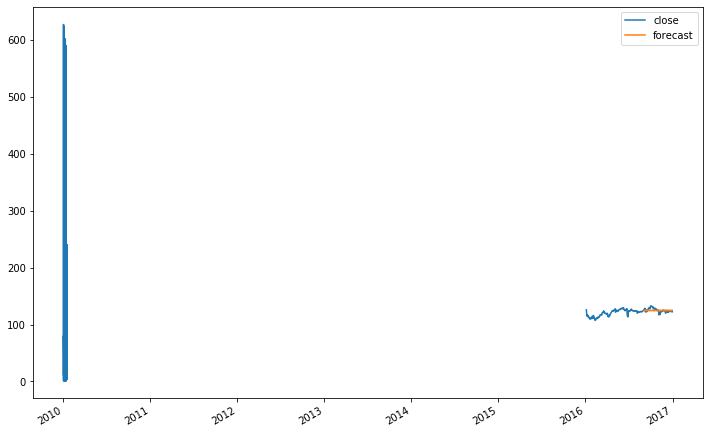

In [75]:
future_df['forecast'] = results.predict(start = 168, end = 250, dynamic= True)  
future_df[['close', 'forecast']].plot(figsize=(12, 8)) 

In [78]:
future_df['forecast'].dropna(inplace=True)

In [81]:
future_df.describe()

,open,close,low,high,volume,first close difference,seasonal difference,forecast
count,5001.000000,5001.000000,5001.000000,5001.000000,5.001000e+03,5000.000000,4994.000000,83.000000
mean,50.701276,50.764809,50.138878,51.230204,6.750756e+06,-0.020462,-0.125643,124.685377
std,51.717788,51.581598,51.071396,52.103937,1.620601e+07,59.642019,70.217685,0.409079
min,1.430000,1.430000,1.390000,1.440000,0.000000e+00,-588.620010,-611.961061,123.996952
25%,25.410000,25.469999,25.090000,25.730000,1.280000e+06,-19.262499,-22.070000,124.167807
50%,38.880002,38.930000,38.490000,39.240002,2.863900e+06,0.070000,0.915002,124.781293
75%,57.959999,58.020000,57.320006,58.590000,6.186700e+06,17.612501,20.244996,124.990335
max,627.181073,626.751061,624.241073,629.511067,3.208684e+08,607.191062,618.791061,125.290910


### THE STANDARD DEVIATION OF THIS MODEL IS TOO LOW SHOWING THE VOLATILITY BEING EXTREMELY LOW FOR A STOCK PRICE PREDICTION . HENCE IT SHOULD NOT BE USED FOR PRACTICL PURPOSES